# **Importing Necessary Libraries**

In [38]:
# We'll start by importing the necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [39]:
# Install the gdown library
!pip install gdown

# Import the gdown library
import gdown

# Google Drive link to the dataset
url = "https://drive.google.com/uc?id=10sofXyF6NjwN6ngLyFfiPI-CUDpeqaN_"

# Download the dataset
gdown.download(url, 'amazon_sales.csv', quiet=False)

# Load dataset into a Pandas DataFrame
df = pd.read_csv('amazon_sales.csv')

Downloading...
From: https://drive.google.com/uc?id=10sofXyF6NjwN6ngLyFfiPI-CUDpeqaN_
To: /content/amazon_sales.csv
100%|██████████| 12.6k/12.6k [00:00<00:00, 22.2MB/s]



# **Data Cleaning and Preprocessing**

**1. Viewing Dataset**

In [40]:
# Display the first few rows of the dataset
print(df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

**2. Performing Data Preprocessing**

In [41]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract month and year from date columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


**3. Displaying the modified DataFrame**

In [42]:
# Display the first few rows of the modified DataFrame
print("First few rows after preprocessing:")
print(df.head())

First few rows after preprocessing:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933 2010-06-27        9925   
1        Online              C 2012-08-22  963881480 2012-09-15        2804   
2       Offline              L 2014-05-02  341417157 2014-05-08        1779   
3        Online              C 2014-06-20  514321792 2014-07-05        8102   
4       Offline              L 2013-02-01  115456712 2013-02-06        5062   

   Unit 

# **Exploratory Data Analysis (EDA)**

**1. Sales Trends Analysis**

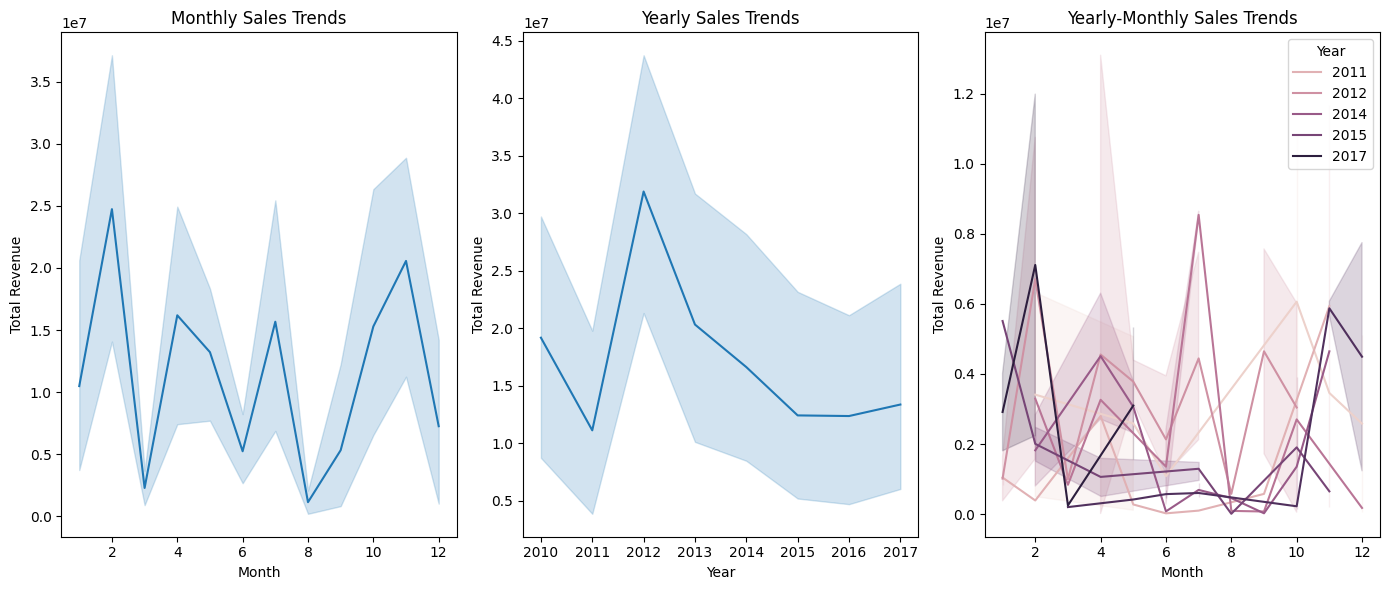

In [43]:
# Explore sales trends month-wise, year-wise, and yearly-month-wise
plt.figure(figsize=(14, 6))

# Monthly Sales Trends
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='Order Month', y='Total Revenue', estimator=sum)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Yearly Sales Trends
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='Order Year', y='Total Revenue', estimator=sum)
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Yearly-Monthly Sales Trends
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='Order Month', y='Total Revenue', hue='Order Year', estimator=sum)
plt.title('Yearly-Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

**2. Relationships Visualization**

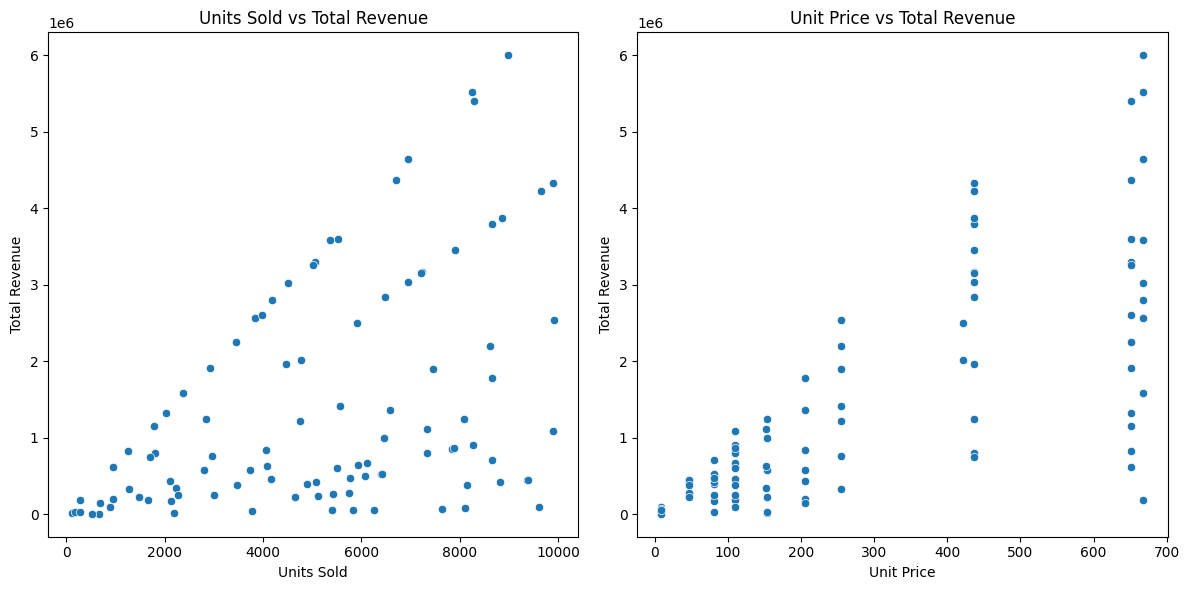

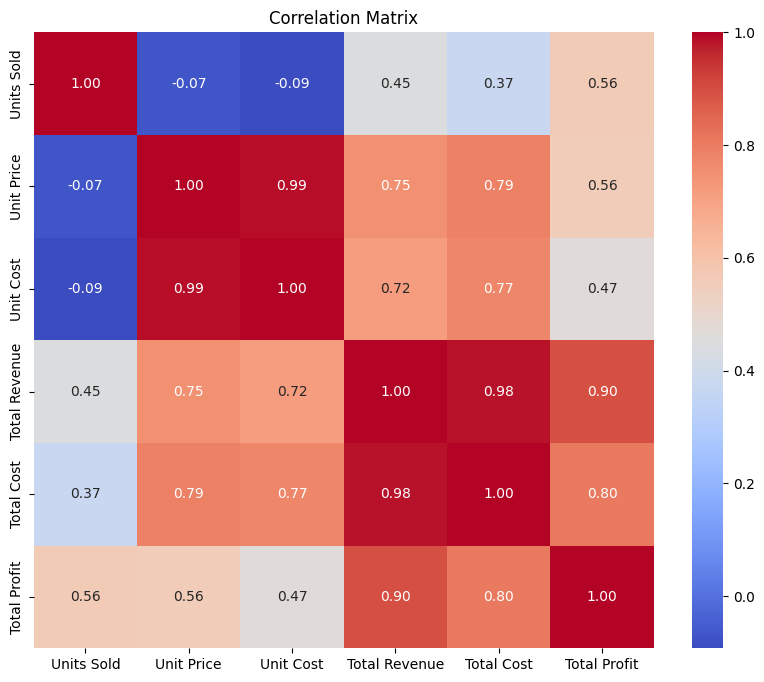

In [44]:
# Visualize relationships between attributes using scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot: Units Sold vs Total Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Units Sold', y='Total Revenue')
plt.title('Units Sold vs Total Revenue')

# Scatter plot: Unit Price vs Total Revenue
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Unit Price', y='Total Revenue')
plt.title('Unit Price vs Total Revenue')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**3. Pair Plot Analysis**

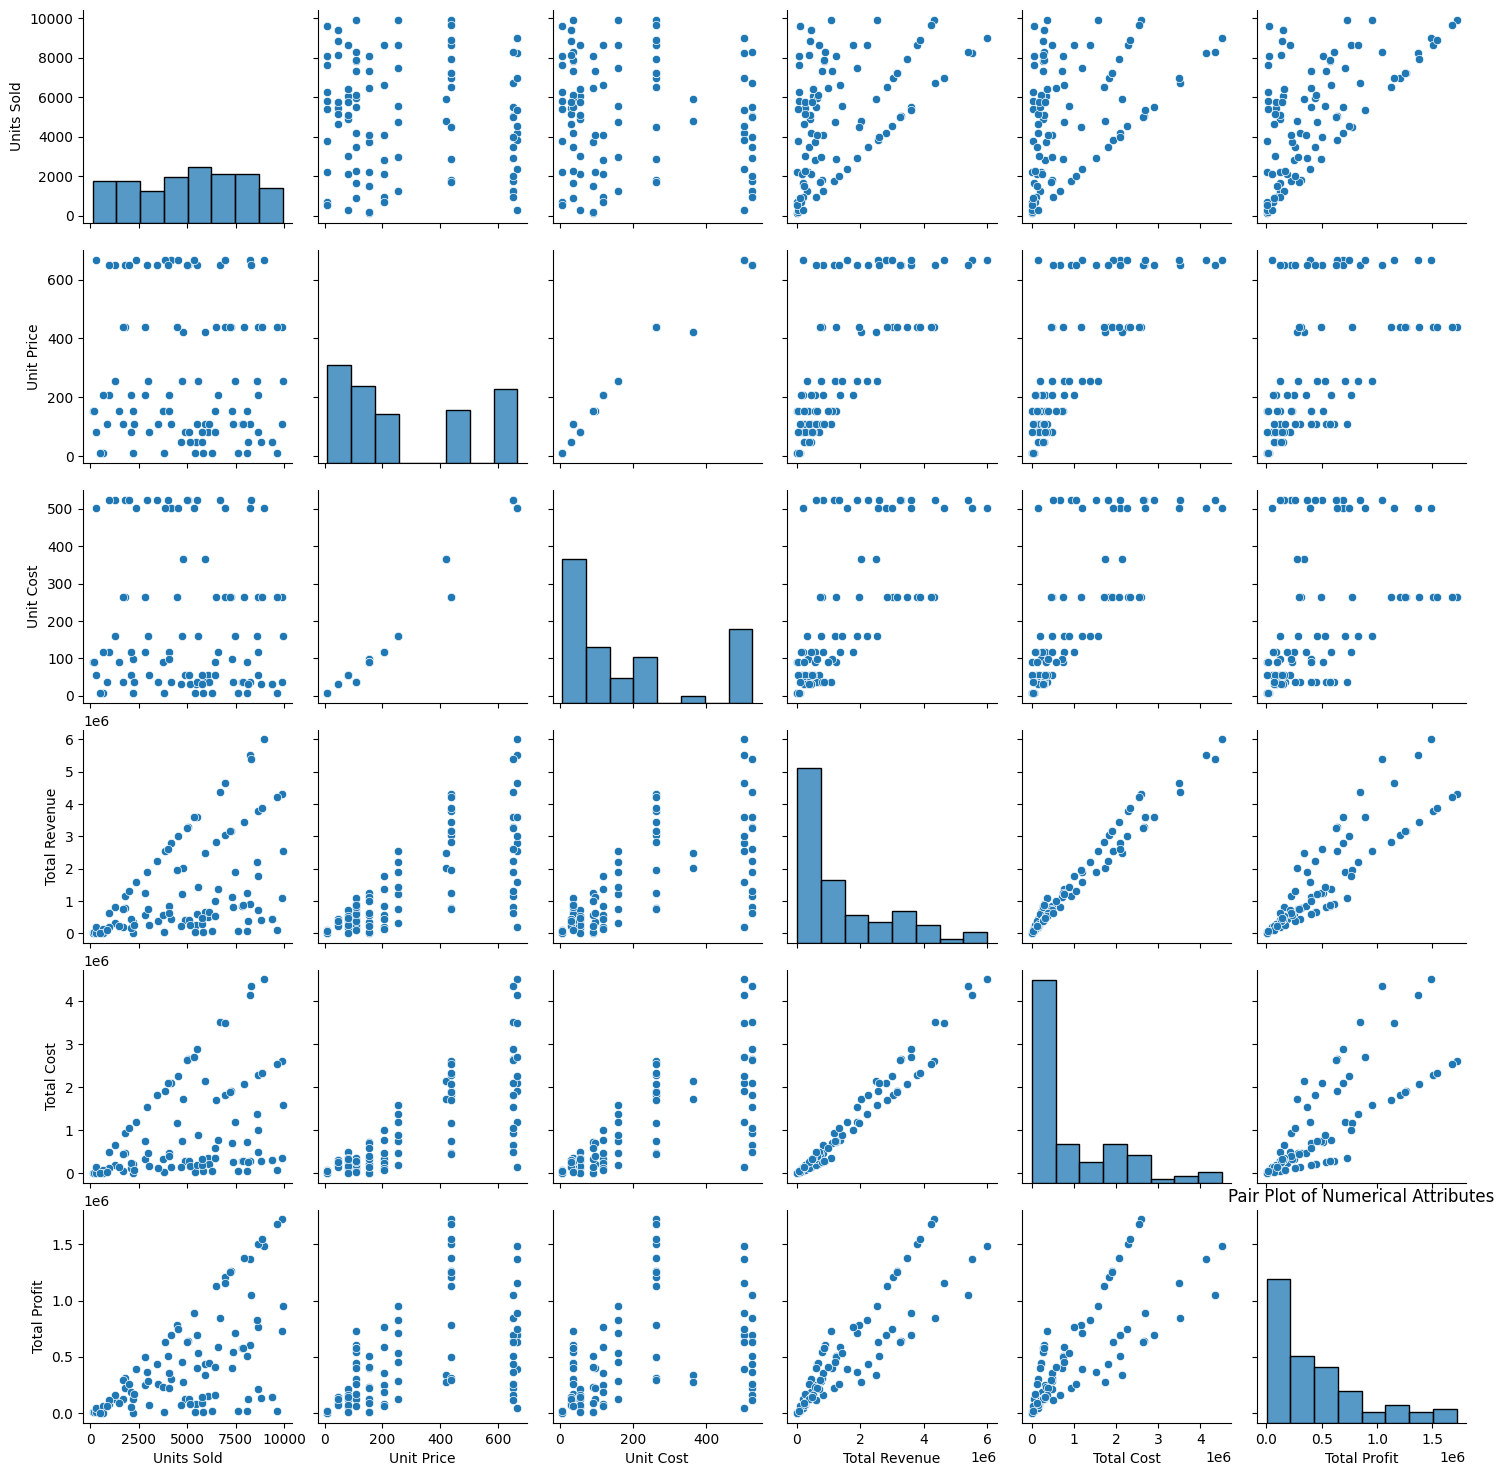

In [45]:
# Visualize relationships between numerical attributes using pair plot
sns.pairplot(df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']])
plt.title('Pair Plot of Numerical Attributes')
plt.show()

**4. Categorical Variables Exploration**

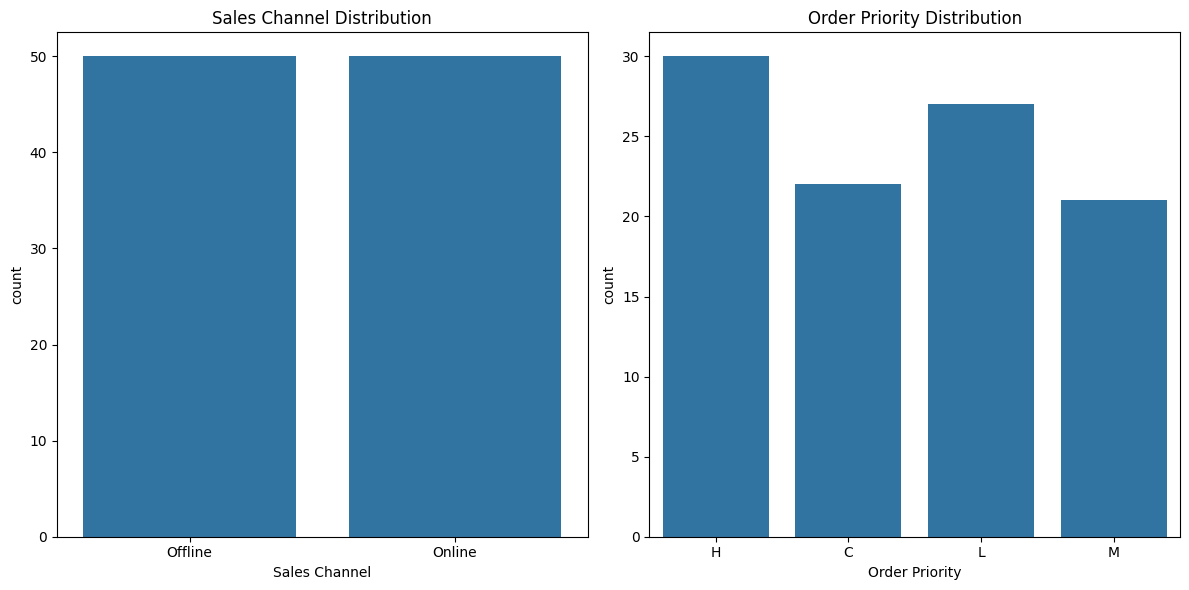

In [46]:
# Explore categorical variables using count plots or bar plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sales Channel')
plt.title('Sales Channel Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Order Priority')
plt.title('Order Priority Distribution')
plt.tight_layout()
plt.show()

# **Data Analysis**

In [47]:
# Calculate average sales per month/year
avg_monthly_sales = df.groupby('Order Month')['Total Revenue'].mean()
avg_yearly_sales = df.groupby('Order Year')['Total Revenue'].mean()

# Product categories with highest sales
top_categories = df.groupby('Item Type')['Total Revenue'].sum().nlargest(5)

# Print average monthly sales
print("Average Monthly Sales:")
print(avg_monthly_sales)

# Print average yearly sales
print("\nAverage Yearly Sales:")
print(avg_yearly_sales)

# Print top product categories by sales
print("\nTop Product Categories by Sales:")
print(top_categories)

Average Monthly Sales:
Order Month
1     1.497495e+06
2     1.903117e+06
3     5.687060e+05
4     1.798576e+06
5     1.201431e+06
6     5.230326e+05
7     1.305793e+06
8     2.820412e+05
9     1.062953e+06
10    1.389780e+06
11    2.285358e+06
12    1.449892e+06
Name: Total Revenue, dtype: float64

Average Yearly Sales:
Order Year
2010    1.918602e+06
2011    9.274305e+05
2012    1.449938e+06
2013    1.694204e+06
2014    1.108681e+06
2015    1.129817e+06
2016    1.237287e+06
2017    1.671677e+06
Name: Total Revenue, dtype: float64

Top Product Categories by Sales:
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Name: Total Revenue, dtype: float64


# **Data Visualization**

**1. Visualizing Top Product Categories by Sales**

This section of the code generates a bar chart to visualize the top product categories by sales revenue. The bar chart provides insights into which product categories contribute the most to the total revenue, allowing for a quick and easy understanding of the sales performance across different product categories.


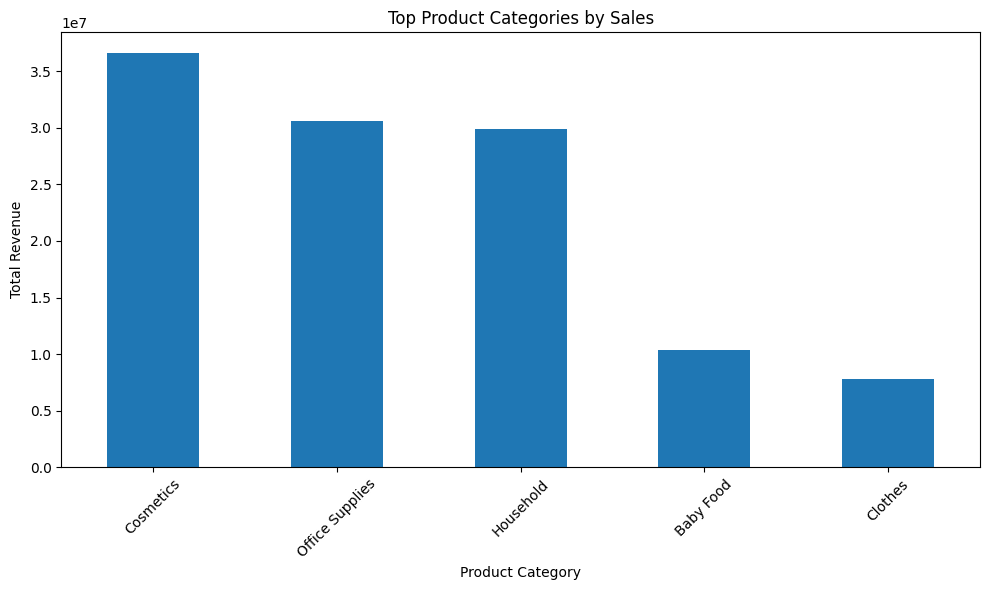

In [48]:
# Visualize top product categories by sales
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Visualizing Distribution of Unit Price and Unit Cost**

This section of the code generates histograms to visualize the distribution of unit prices and unit costs. Histograms provide insights into the frequency distribution of values within a given range, allowing for an understanding of the variability and central tendency of the data.

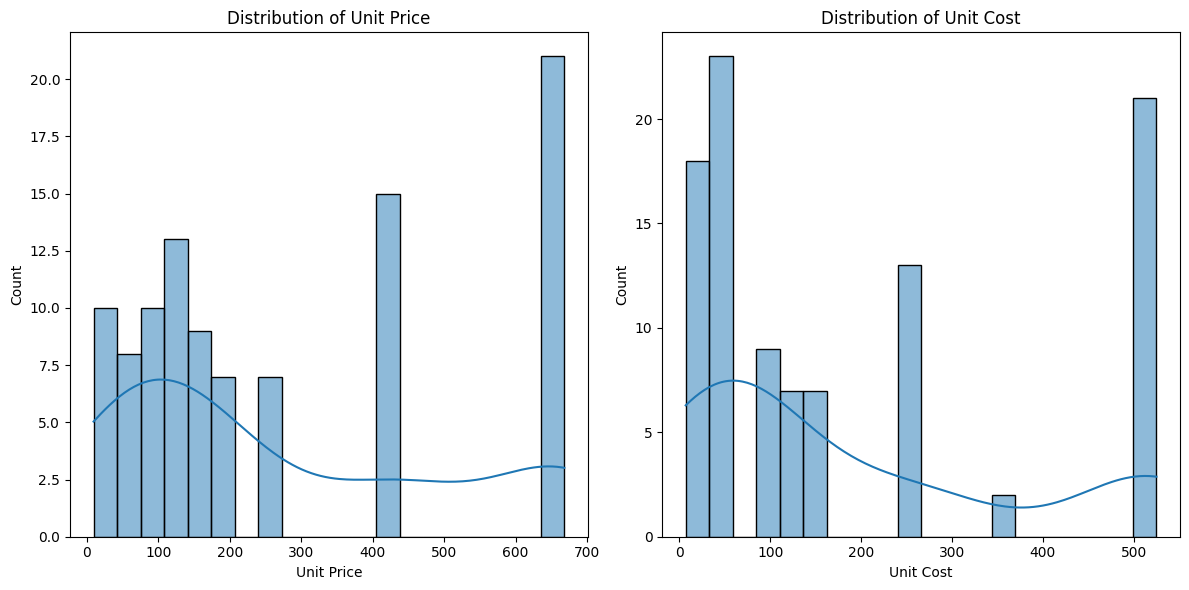

In [49]:
# Visualize distribution of unit price and unit cost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Unit Price'], bins=20, kde=True)
plt.title('Distribution of Unit Price')

plt.subplot(1, 2, 2)
sns.histplot(df['Unit Cost'], bins=20, kde=True)
plt.title('Distribution of Unit Cost')
plt.tight_layout()
plt.show()

# **Advanced Data Visualization**

In [50]:
# Import Plotly
import plotly.graph_objects as go

# Calculate total revenue for each product category
category_revenue = df.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Create an interactive bar chart
fig = go.Figure(data=[go.Bar(
    x=category_revenue['Item Type'],
    y=category_revenue['Total Revenue'],
    hovertext=category_revenue['Total Revenue'],  # Display revenue on hover
    marker_color='skyblue'  # Change color of bars
)])

# Customize the layout
fig.update_layout(
    title='Total Revenue by Product Category',
    xaxis=dict(title='Product Category'),
    yaxis=dict(title='Total Revenue'),
    plot_bgcolor='rgba(0,0,0,0)'  # Set background color to transparent
)

# Show the interactive plot
fig.show()

# **Conclusion and Insights**

In [51]:
print("Conclusion and Insights:")
print("- The analysis reveals various trends and relationships in the sales data.")
print("- Monthly sales exhibit seasonal variations, with higher sales during certain months.")
print("- Yearly sales have been increasing steadily over the years, indicating overall business growth.")
print("- There is a strong positive correlation between units sold and total revenue, indicating that higher sales volumes contribute to higher revenue.")
print("- The correlation matrix highlights strong correlations between units sold, total revenue, and total profit, suggesting that these variables are closely related.")
print("- Recommendations for improving sales performance:")
print("- Explore targeted marketing strategies to capitalize on peak sales months and drive sales during slower months.")
print("- Analyze pricing strategies to optimize profit margins while maintaining competitive pricing.")
print("- Consider expanding product offerings or entering new markets to further drive revenue growth.")

Conclusion and Insights:
- The analysis reveals various trends and relationships in the sales data.
- Monthly sales exhibit seasonal variations, with higher sales during certain months.
- Yearly sales have been increasing steadily over the years, indicating overall business growth.
- There is a strong positive correlation between units sold and total revenue, indicating that higher sales volumes contribute to higher revenue.
- The correlation matrix highlights strong correlations between units sold, total revenue, and total profit, suggesting that these variables are closely related.
- Recommendations for improving sales performance:
- Explore targeted marketing strategies to capitalize on peak sales months and drive sales during slower months.
- Analyze pricing strategies to optimize profit margins while maintaining competitive pricing.
- Consider expanding product offerings or entering new markets to further drive revenue growth.
